<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

In [1]:
# start with this code
import pandas as pd
import numpy as np
#from utils import qualityRMSE, qualityMedianAE
#from utils import ExponentialSmoothing
from datetime import datetime, timedelta
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

/home/gasia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## monthly_wage.csv :

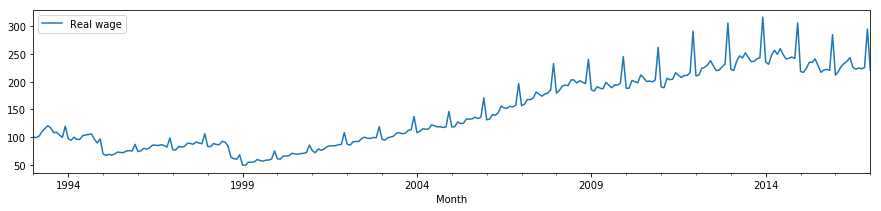

In [2]:
ts = pd.read_csv('./data/mothly_wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(15,3))

In [3]:
print(ts.shape)
print(ts.head())
print('\n', ts.tail())

(289, 1)
            Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

             Real wage
Month                
2016-09-01      224.9
2016-10-01      223.6
2016-11-01      225.6
2016-12-01      295.3
2017-01-01      220.3


In [4]:
ts['Real wage'].describe()

count    289.000000
mean     147.038478
std       66.595362
min       48.770000
25%       86.760000
50%      124.500000
75%      207.600000
max      316.800000
Name: Real wage, dtype: float64

From the plot we can see an obvious trends, in the first part until year 1999, the trend is almost decreasing, then starting from 1999 the trend is increasing. There is a changes in level in TS as the trend is strictly increasing after 1999, and also there is seasonality, let's check the period of the seasonality:

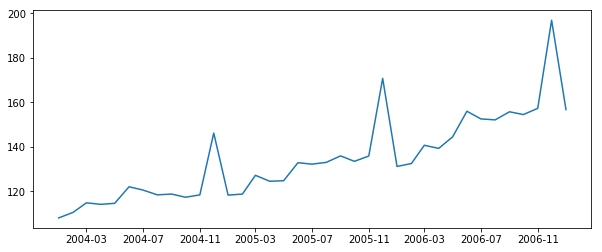

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ts.loc['2004-01-01': '2007-01-01'])
plt.show()

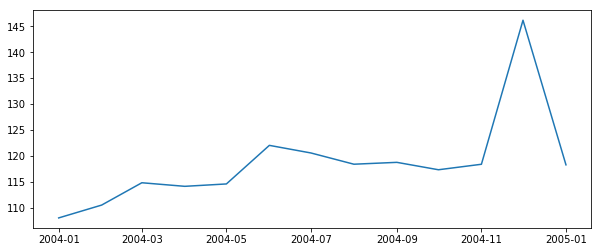

In [6]:
plt.figure(figsize=(10,4))
plt.plot(ts.loc['2004-01-01': '2005-01-01'])
plt.show()

The period of the seasonality is one year which means 12.
We can say that we almost have multiplicative trend with additive seasonality

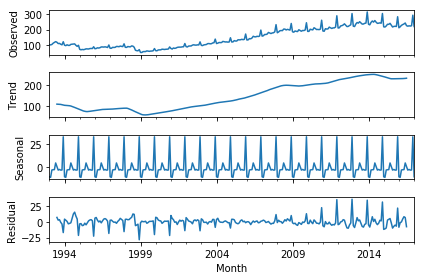

In [7]:
res = sm.tsa.seasonal_decompose(ts['Real wage'].loc['1993-01-01':'2017-01-01'].resample("M").sum())
resplot = res.plot()

WE can also notice the trend and seasonality from the decomposite graphs

## TS_dep36.csv :

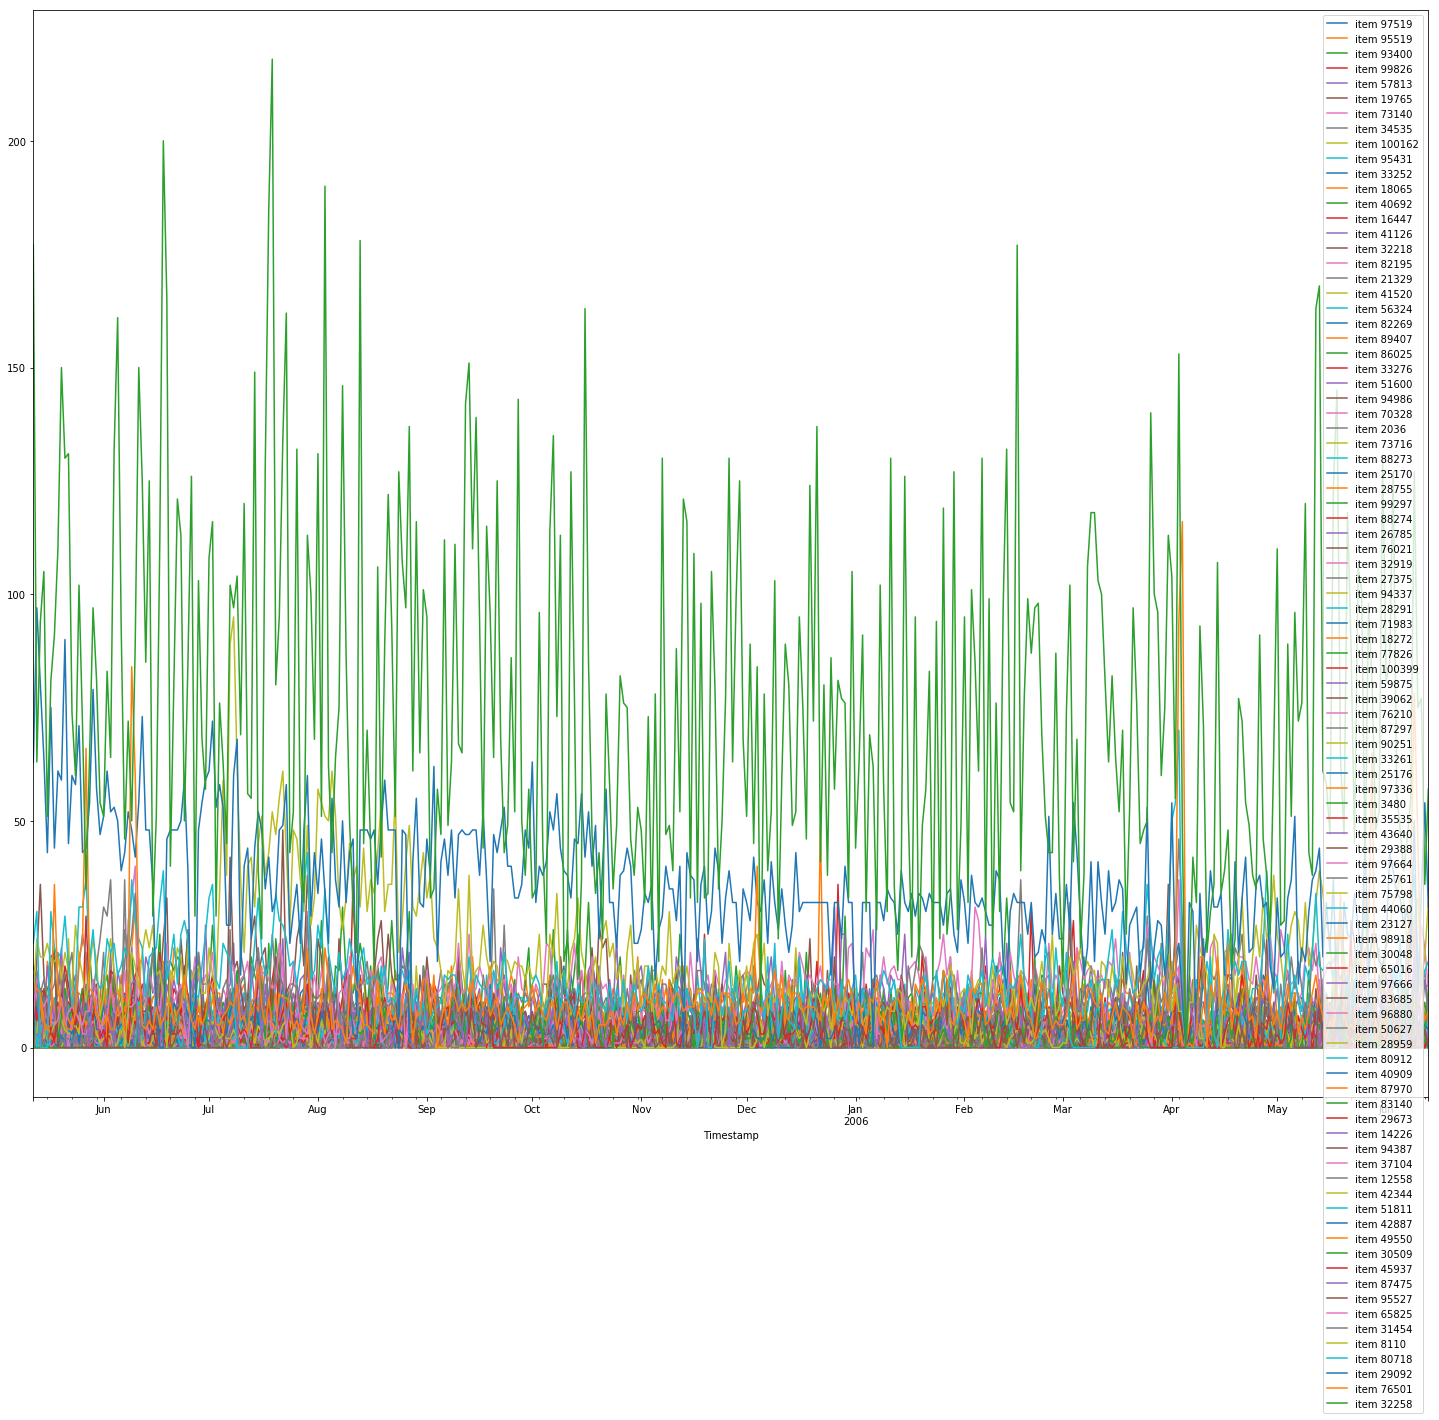

In [8]:
ts = pd.read_csv('./data/TS_dep36.csv', sep=';', decimal='.', index_col= 'Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(25,20))

Aggregate the data to make the plot clearer

In [9]:
ts_sum = pd.DataFrame(ts.sum(axis=1), columns = ['data'])

In [10]:
ts_sum.head()

data
Timestamp        
2005-05-12  625.0
2005-05-13  620.0
2005-05-14  528.0
2005-05-15  465.0
2005-05-16  448.0

In [11]:
ts_sum.shape, ts.shape

((398, 1), (398, 105))

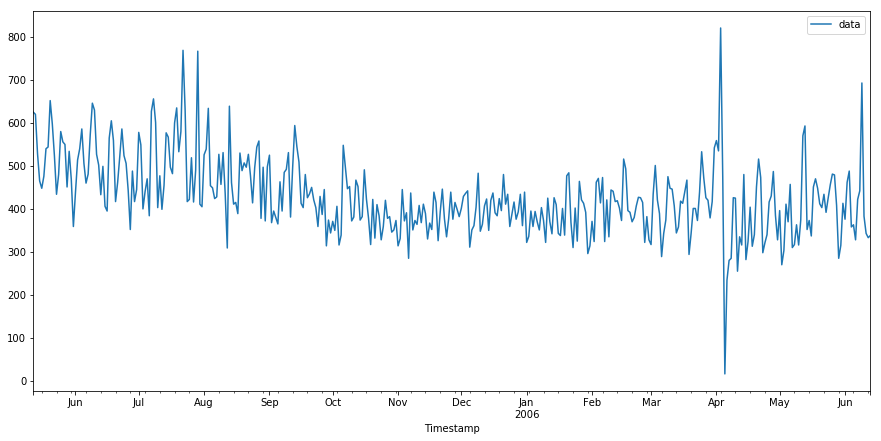

In [12]:
ts_sum.plot(figsize=(15,7))

There isn't an obvious seasonality, the same for trend (we will check later in decomposite graph). Although we can say that at some point near August 2005 there is slowly decreasing trend. Considering the small changes in the trend, we can say that there is a small changes in level in TS.

In [13]:
ts_sum.shape

(398, 1)

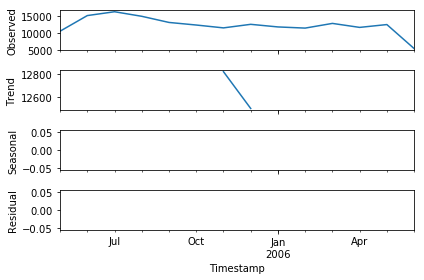

In [14]:
res = sm.tsa.seasonal_decompose(ts_sum['data'].resample("M").sum())
resplot = res.plot()

the small part decresing trend is there, and there is no seasonality.

# TS_dep42.csv:

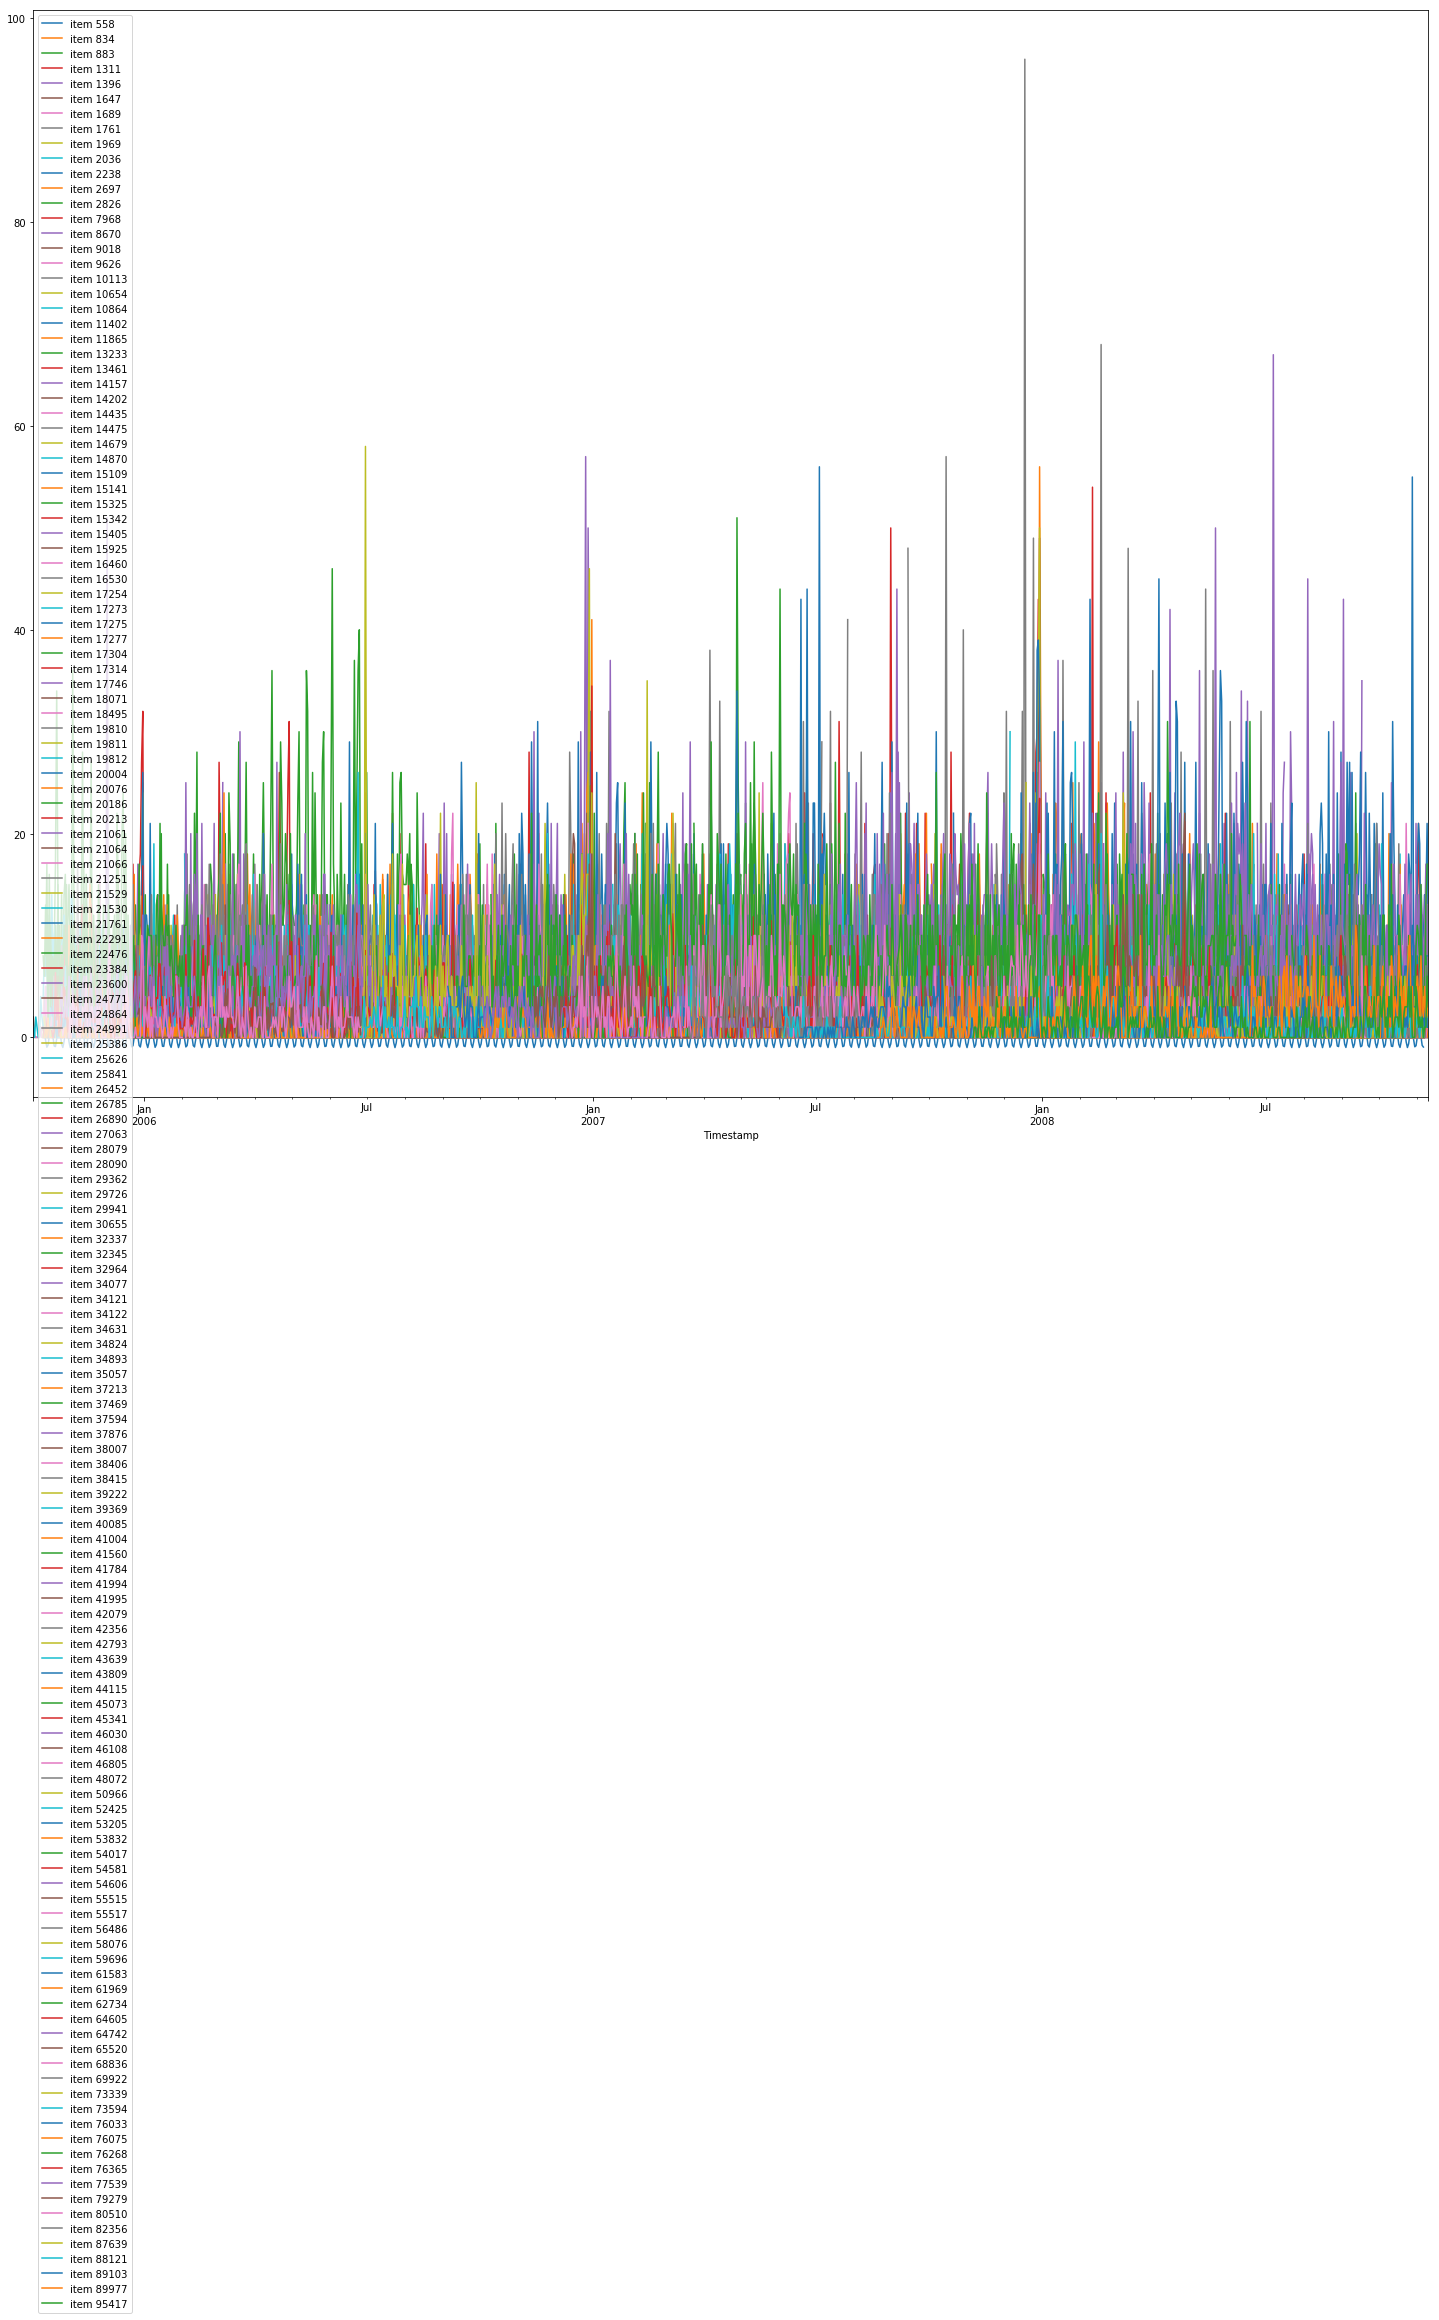

In [15]:
ts = pd.read_csv('./data/TS_dep42.csv', sep=';', decimal='.', index_col= 'Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(25,20))

Let's aggregate the data:

In [16]:
ts_sum = pd.DataFrame(ts.sum(axis=1), columns = ['data'])

In [17]:
ts_sum.head()

data
Timestamp       
2005-10-03   4.0
2005-10-04   0.0
2005-10-05   2.0
2005-10-06   1.0
2005-10-07   0.0

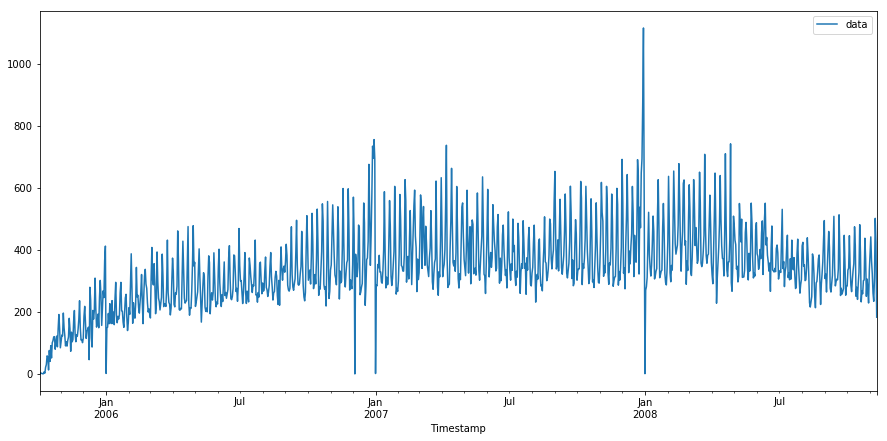

In [18]:
ts_sum.plot(figsize=(15,7))

There is an increasing trend which is obvious in the beginning of the plot of time series, then there is also a decresing trend starting from May 2008. There isn't an obvious seasonality (we will check it later too). The level of TS is almost not changeing (if we didn't consider the first increasing trend and the last deacrisng trend).

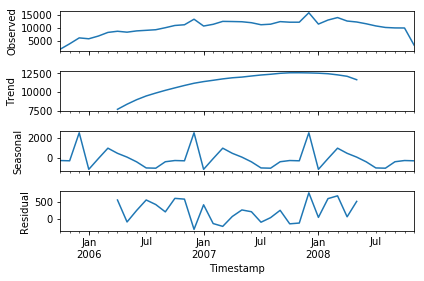

In [19]:
res = sm.tsa.seasonal_decompose(ts_sum['data'].resample("M").sum())
resplot = res.plot()

From the decompoite graph we can see a seasonality in the TS, and also the incresing trend (but not the decreasing one). The period of the seasonality is 1 year (from july 2006, until july 2007) so it is 12.

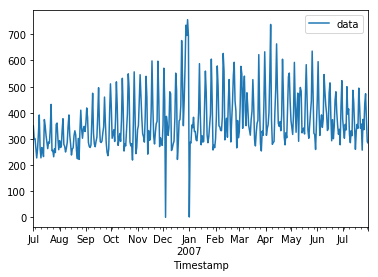

In [20]:
ts_sum['2006-07':'2007-07'].plot()

#  TS_dep6.csv:

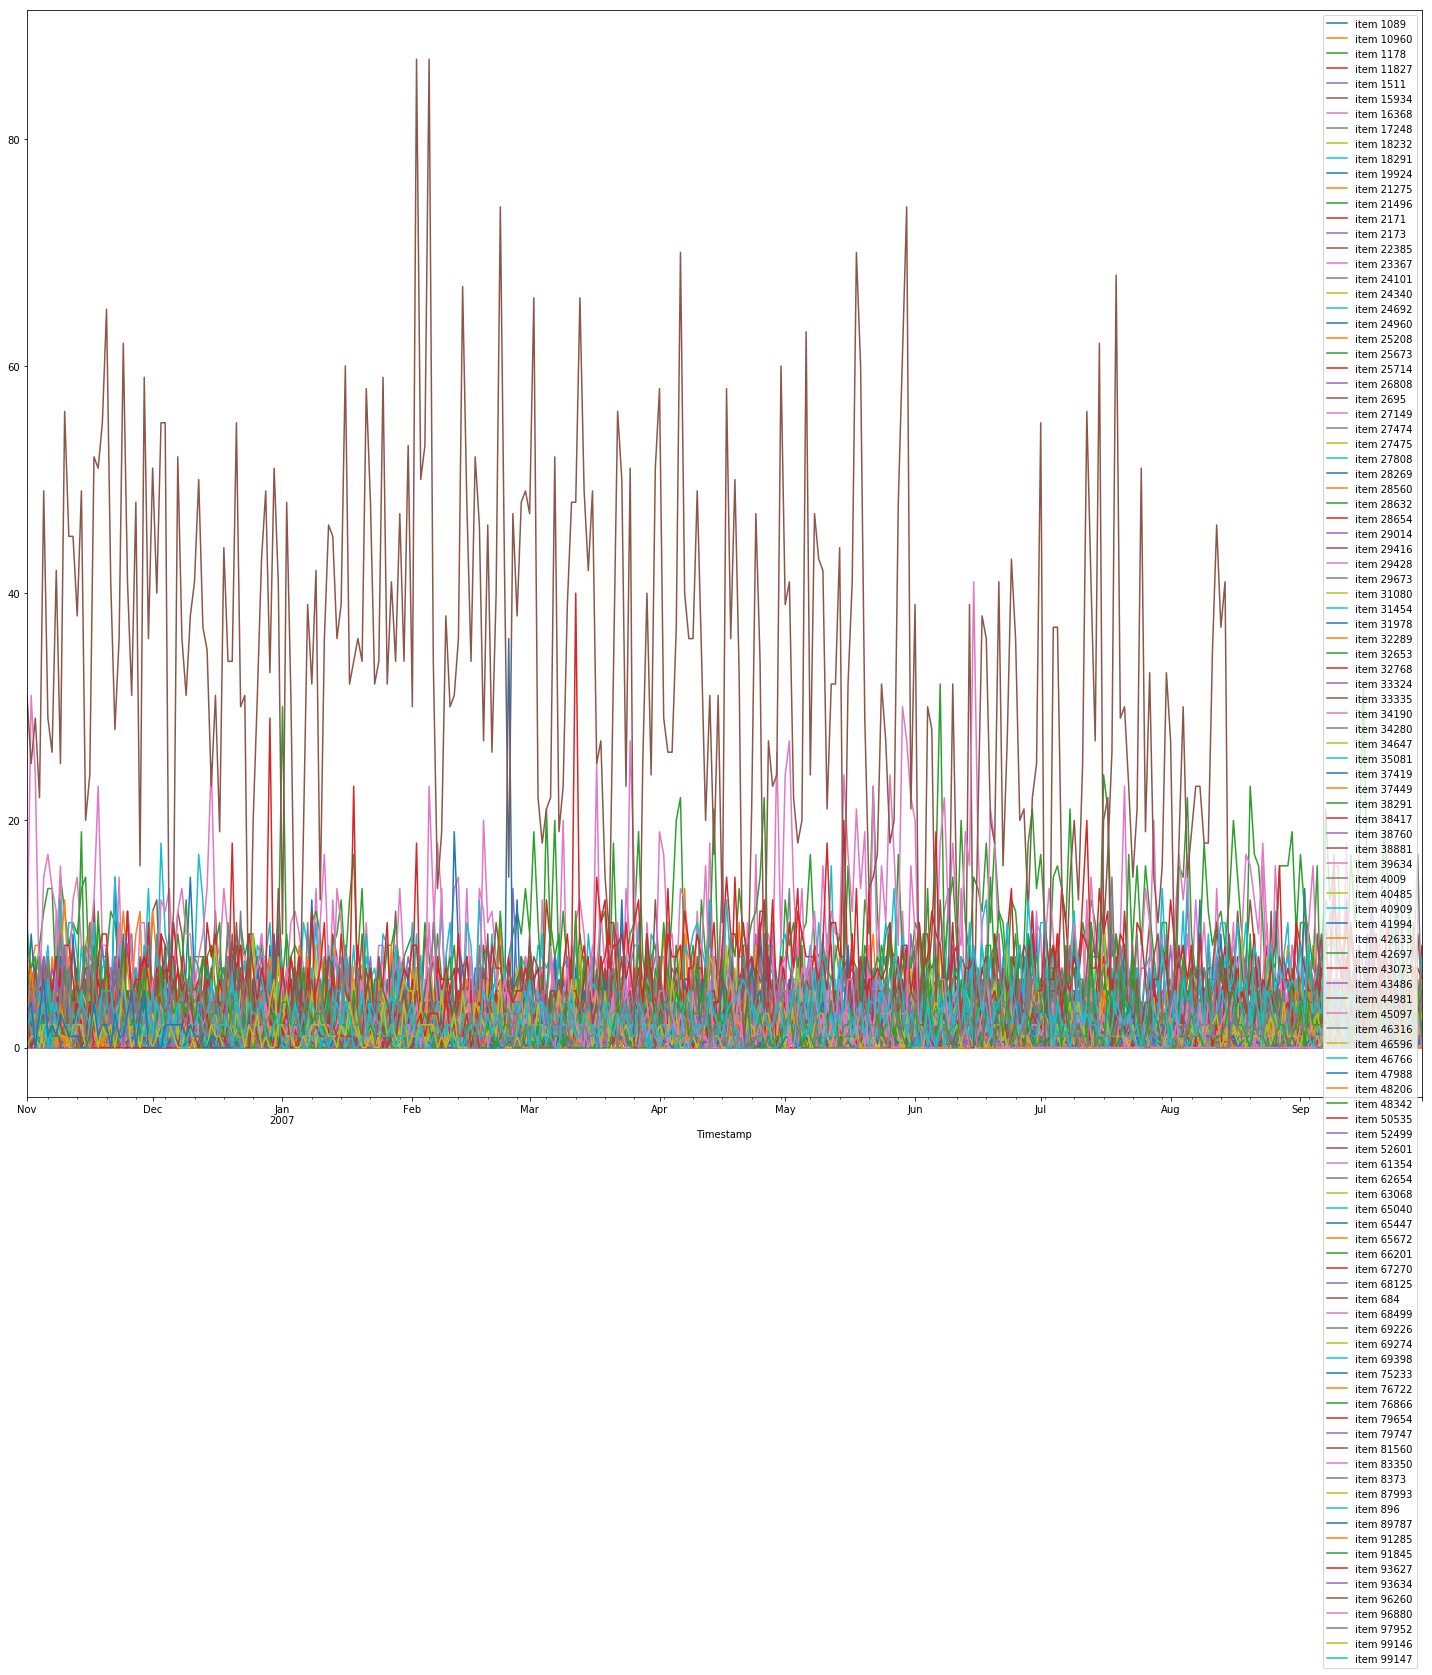

In [21]:
ts = pd.read_csv('./data/TS_dep6.csv', sep=';', decimal='.', index_col= 'Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(25,20))

In [22]:
ts.head(3)

item 1089  item 10960  item 1178  item 11827  item 1511  \
Timestamp                                                             
2006-11-01        1.0         2.0        0.0         3.0        3.0   
2006-11-02        2.0         2.0        4.0         0.0        0.0   
2006-11-03        4.0         4.0        1.0         3.0        3.0   

            item 15934  item 16368  item 17248  item 18232  item 18291  \
Timestamp                                                                
2006-11-01         0.0         0.0         2.0         3.0         4.0   
2006-11-02         1.0         0.0         5.0         1.0         6.0   
2006-11-03         1.0         0.0         5.0         6.0         7.0   

               ...      item 89787  item 91285  item 91845  item 93627  \
Timestamp      ...                                                       
2006-11-01     ...             3.0         NaN         NaN         NaN   
2006-11-02     ...             4.0         NaN         NaN         NaN   
2006-11-03     ...             0.0         NaN         NaN         NaN   

            item 93634  item 96260  item 96880  item 97952  item 99146  \
Timestamp                                                                
2006-11-01         NaN         NaN         NaN         NaN         NaN   
2006-11-02         NaN         NaN         NaN         NaN         NaN   
2006-11-03         NaN         NaN         NaN         NaN         NaN   

            item 99147  
Timestamp               
2006-11-01         NaN  
2006-11-02         NaN  
2006-11-03         NaN  

[3 rows x 110 columns]

In [23]:
ts_sum = pd.DataFrame(ts.sum(axis=1), columns = ['data'])

In [24]:
ts_sum.head(3)

data
Timestamp          
2006-11-01  228.967
2006-11-02  274.494
2006-11-03  276.026

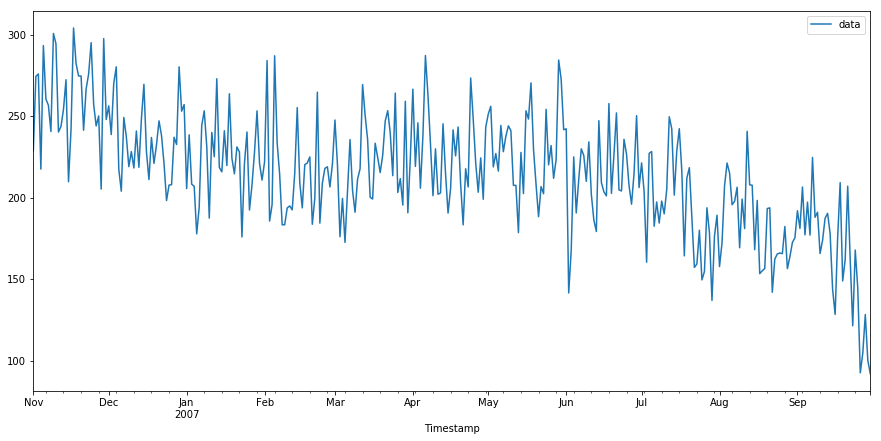

In [25]:
ts_sum.plot(figsize = (15,7))

There is a decreasing trend in the TS. There is no an obious seasonality (we will check it later). There are some changes in the level of TS.

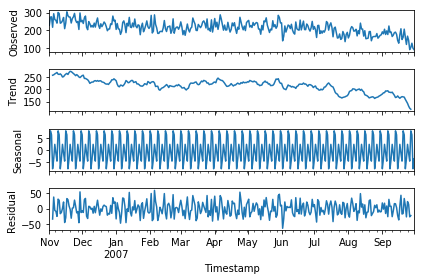

In [26]:
tt = ts_sum.dropna()
res = sm.tsa.seasonal_decompose(tt['data'].resample("D").sum())
resplot = res.plot()

There is a daily seasonality, so the period is 1, there is a decreasing trend.

------

<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step chould be 1 year). Repeat point 1)-2) for aggregated TS.

In [27]:
ts = pd.read_csv('./data/mothly_wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

In [28]:
ts.head()

Real wage
Month                
1993-01-01     100.00
1993-02-01      99.04
1993-03-01     101.77
1993-04-01     110.05
1993-05-01     115.47

### Loss

In [29]:
def qualityRMSE(x,y):
    # Root mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (((x-y)**2).mean())**(0.5) , (x-y)**2

In [30]:
def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

###  -1-


alpha: 0.23 loss: 16.3279587438


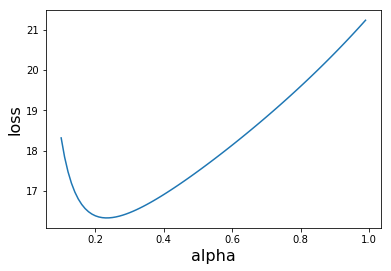

In [31]:
ts_1=ts.loc['1998-09':'2015-01']
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_1 = pd.DataFrame(index = ts_1.index.append(rng), columns = ts_1.columns)

min_loss = math.inf
min_alpha = 10

plot_loss = []

ALPHA = np.arange(0.1,1,0.01)
for alpha in ALPHA:
    # ES params
    Params ={'alpha':alpha}
    # forecast
    for cntr in ts_1.columns:
        x = ts_1[cntr]
        frc_ts_1[cntr] = SimpleExponentialSmoothing(x, h, Params)
        
    Quality, _ = qualityRMSE(ts_1, frc_ts_1)
    plot_loss.append(Quality[0])
    
    if(Quality[0] < min_loss ):
        min_loss = Quality[0]
        min_alpha = alpha
    #print('alpha:',alpha, ' loss:', Quality[0])

plt.plot(ALPHA, plot_loss)
plt.xlabel('alpha', fontsize = 16)
plt.ylabel('loss', fontsize = 16)
print()
print('alpha:' , min_alpha , 'loss:', min_loss)

Best alpha is 0.23, which is close to 0

### -2-

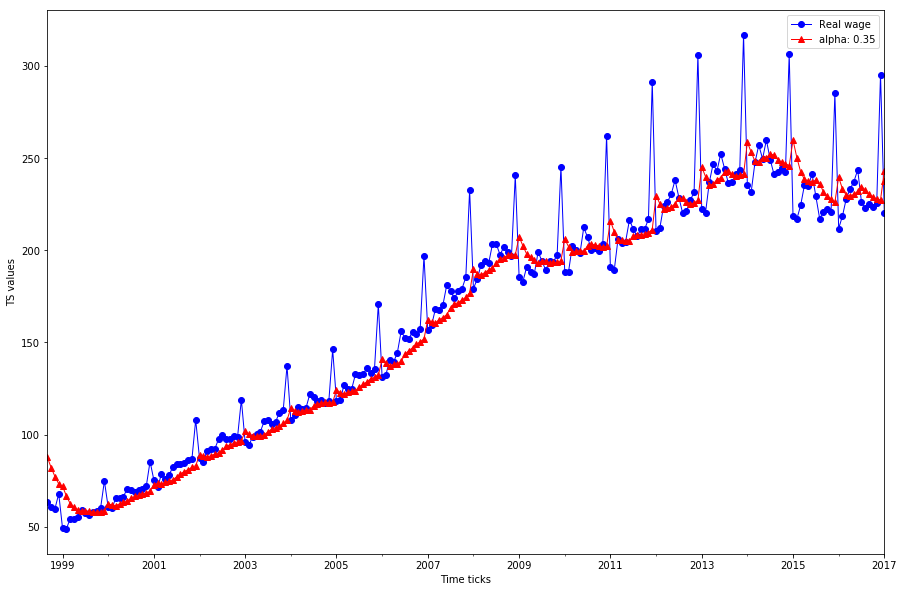

In [32]:
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params ={'alpha':min_alpha}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.35))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

 SES cannot be used for this TS, because TS has seasonality and trend which are not being considered by this method

### -3-

In [33]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

21.958896660497928


### -4-

In [34]:
ts_year = ts.resample("12M").mean()

#### -1-

In [35]:
h = 1
ts_1=ts_year.loc['1998-09':'2015-01']

start = ts_year.index[-1]+timedelta(1)
end = ts_year.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_1 = pd.DataFrame(index = ts_1.index.append(rng), columns = ts_1.columns)

min_loss = math.inf
min_alpha = 10

ALPHA = np.arange(0.1,1,0.01)
for alpha in ALPHA:
    # ES params
    Params ={'alpha':alpha}
    # forecast
    for cntr in ts_1.columns:
        x = ts_1[cntr]
        frc_ts_1[cntr] = SimpleExponentialSmoothing(x, h, Params)
        
    Quality, _ = qualityRMSE(ts_1, frc_ts_1)
    
    if(Quality[0] < min_loss ):
        min_loss = Quality[0]
        min_alpha = alpha
    #print('alpha:',alpha, ' loss:', Quality[0])
    
print()
print('alpha:' , min_alpha , 'loss:', min_loss)


alpha: 0.99 loss: 14.749988186


The optimal value for alpha is 0.99 which is close to 1

#### -2-

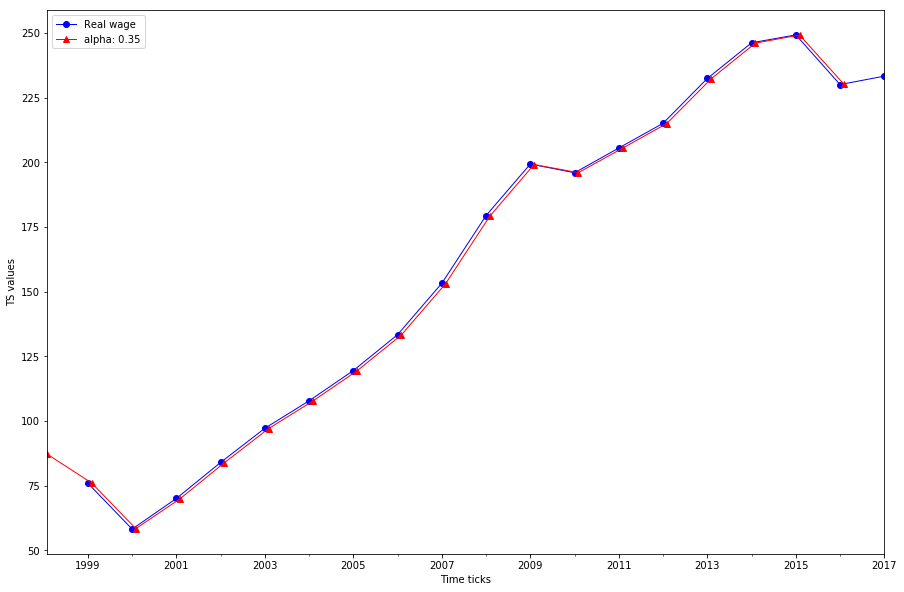

In [36]:
h = 1
start = ts_year.index[-1]+timedelta(1)
end = ts_year.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts_year.index.append(rng), columns = ts_year.columns)

ts_year.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params ={'alpha':min_alpha}

# forecast
for cntr in ts.columns:
    x = ts_year[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.35))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

The forecast is doing pretty well, let's look at it one more time with only putting the years:

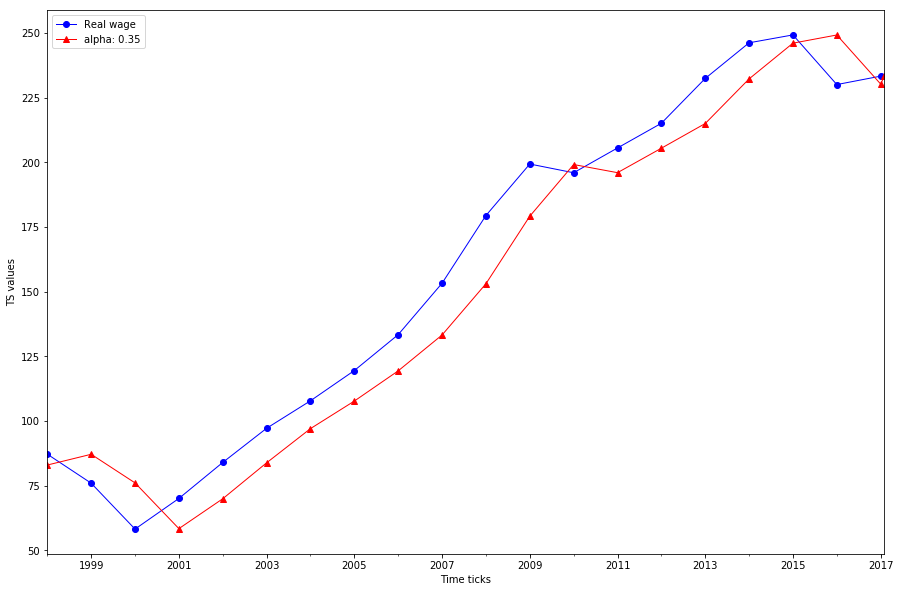

In [37]:
h = 1
start = ts_year.index[-1]+timedelta(1)
end = ts_year.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts_year.index.append(rng), columns = ts_year.columns)

ts_year.loc['1998':'2017'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params ={'alpha':min_alpha}

# forecast
for cntr in ts.columns:
    x = ts_year[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998':'2017'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(0.35))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

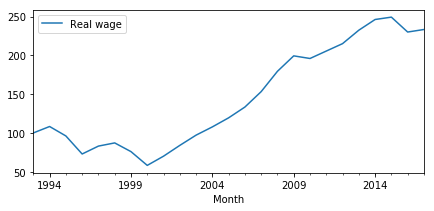

In [38]:
ts_year.plot(figsize = (7,3))

We still have a trend, but we don't have a seasonality. I would say that SES shouldn't be used for this TS as the trend is not being considered.

-----

<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

### -1-

In [39]:
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= 0               # initialize ts level 
    s= [np.NaN]*(p)    # initalize seasonality values (it must be vector of lenth p)
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]# initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]-l# TODO: itinilize 
             
            s_saved = s[cntr % p]
            s[cntr % p] = delta * (x[cntr] - l ) + (1 - delta) * s[cntr % p] # recurrent smoothing of seasonality
            l = alpha * (x[cntr] - s_saved) + (1- alpha) * l             # recurrent smoothing of level 
            
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST

### -2-

In [40]:
h = 1

start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ALPHA = np.arange(0.1, 1, 0.01)

min_loss= math.inf
min_delta = 0
min_alpha = 0
plot_loss = []

for alpha in ALPHA:
    for delta in ALPHA:
    # ES params
        Params={'alpha':alpha, 'delta':delta, 'seasonality_period':12}
        # forecast
        for cntr in ts.columns:
            x = np.array(ts[cntr])
            frc_ts[cntr] = WintersExponentialSmoothing(x, h, Params)
        
        Quality, _ = qualityRMSE(ts, frc_ts)
        plot_loss.append(Quality[0])
        
        if(min_loss > Quality[0]):
            min_loss = Quality[0]
            min_delta = delta
            min_alpha = alpha
        #print('alpha:', alpha,'delta:', delta,'loss:',  Quality[0])
        
print()
print('alpha:', min_alpha,'delta:', min_delta,'loss:', min_loss)


alpha: 0.85 delta: 0.53 loss: 4.87380826527


Optimal value for:

alpha: 0.85 

delta: 0.53 
        
loss: 4.87380826527

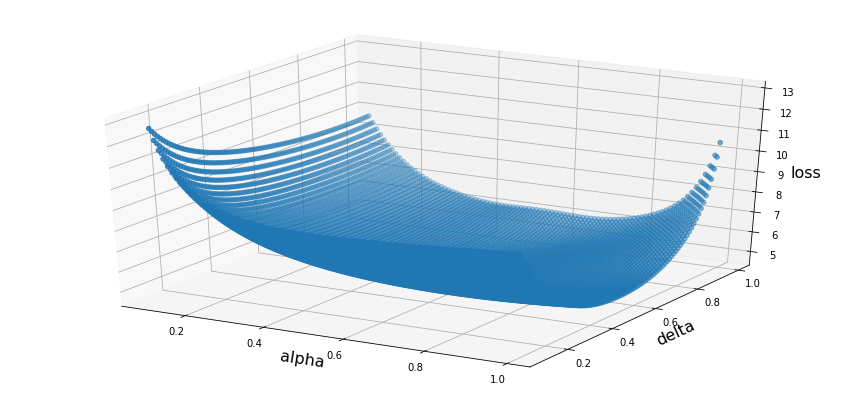

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = y = np.arange(0.1, 1, 0.01)
xy = list(itertools.product(x, y))
x = [item[0] for item in xy]
y = [item[1] for item in xy]

fig = plt.figure(figsize=(15,7))
ax = fig.gca(projection='3d')

ax.scatter(x, y, plot_loss, zdir='z', c=None, depthshade=True)
ax.set_xlabel('alpha', fontsize = 16)
ax.set_ylabel('delta', fontsize = 16)
ax.set_zlabel('loss', fontsize = 16)

### -3-

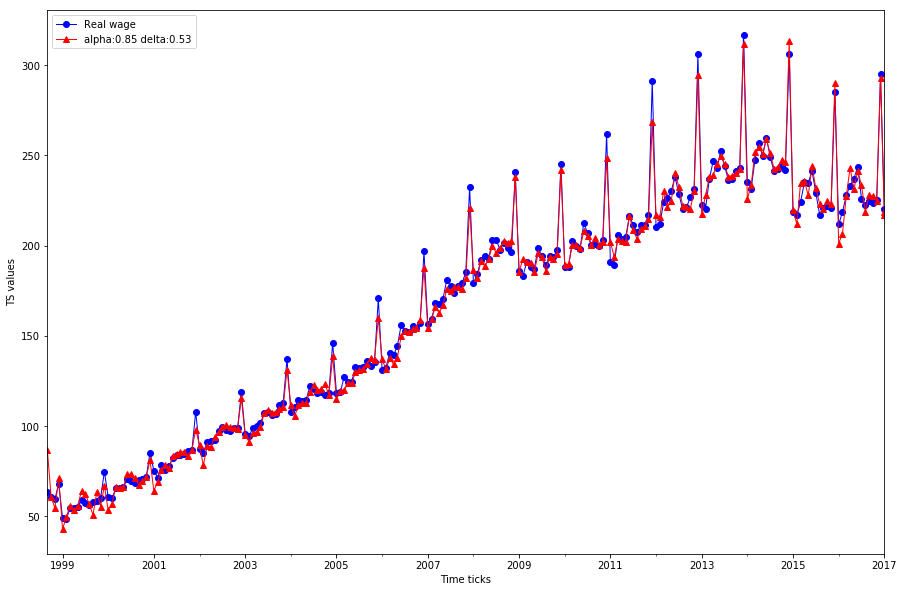

In [42]:
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params={'alpha':min_alpha, 'delta':min_delta, 'seasonality_period':12}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = WintersExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha:'+str(min_alpha)+ ' delta:' + str(min_delta))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

### -4-

In [43]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

5.668316795069847


loss of SES:           21.958

loss of Winter's ES: 5.668

Comparing the Accuracy (the loss), Winter's model is doing 4 times better than SES.

### -5-

If we only have two choices, SES or Winter's ES, of course we would choose Winter's ES for this TS. As Winter's ES is considering the seasonality of our data wherease SES is not. However, we need some model that consider both seasonality and trend of the TS. 

-----

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

### -1-

In [44]:
###################### Theil Wage Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delta <scalar in [0,1]> - seasonality smoothing parameter
#    beta <scalar in [0,1]> - trend smoothing parameter

def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    delta = Params['delta']
    
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    b= 0
    l= 0               # initialize ts level 
    s= [np.NaN]*(p)    # initalize seasonality values (it must be vector of lenth p)
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]# initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]-l# TODO: itinilize 
            
            if math.isnan(b):
                b= x[cntr]# initialize 
               
            l_saved = l
            s_saved = s[cntr % p]
            
            l = alpha * (x[cntr] - s[cntr % p]) + (1- alpha) * (l + b)            # recurrent smoothing of level 
            b = beta * (l - l_saved) + (1 - beta) * b                             # recurrent smoothing of trend
            s[cntr % p] = delta * (x[cntr] - l ) + (1 - delta) * s[cntr % p] # recurrent smoothing of seasonality
            
            
        FORECAST[cntr+h] = l + b*h + s[(cntr+h) % p]
    return FORECAST

### -2-

In [45]:
h = 1

start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
ts1 = ts.loc[:'2015-01']
frc_ts = pd.DataFrame(index = ts1.index.append(rng), columns = ts.columns)

ALPHA = np.arange(0.1, 1, 0.05)

min_loss= math.inf
min_beta = 0
min_alpha = 0
min_delta = 0

for alpha in ALPHA:
    for beta in ALPHA:
        for delta in ALPHA:
            Params={'alpha':alpha, 'beta':beta, 'delta': delta, 'seasonality_period':12}
            for cntr in ts1.columns:
                x = np.array(ts1[cntr])
                frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
            

            Quality, _ = qualityRMSE(ts1 , frc_ts)

            if(min_loss > Quality[0]):
                min_loss = Quality[0]
                min_beta = beta
                min_alpha = alpha
                min_delta = delta
            #print('alpha:', alpha,'beta:', beta, ' delta:', delta ,'loss:',  Quality[0])
        
print()
print('alpha:', min_alpha,'beta:', min_beta, 'delta:', delta, 'loss:',  min_loss)


alpha: 0.6 beta: 0.1 delta: 0.95 loss: 5.39486736276


alpha: 0.6

beta: 0.1 

delta: 0.95

loss: 5.39486736276

### -3-

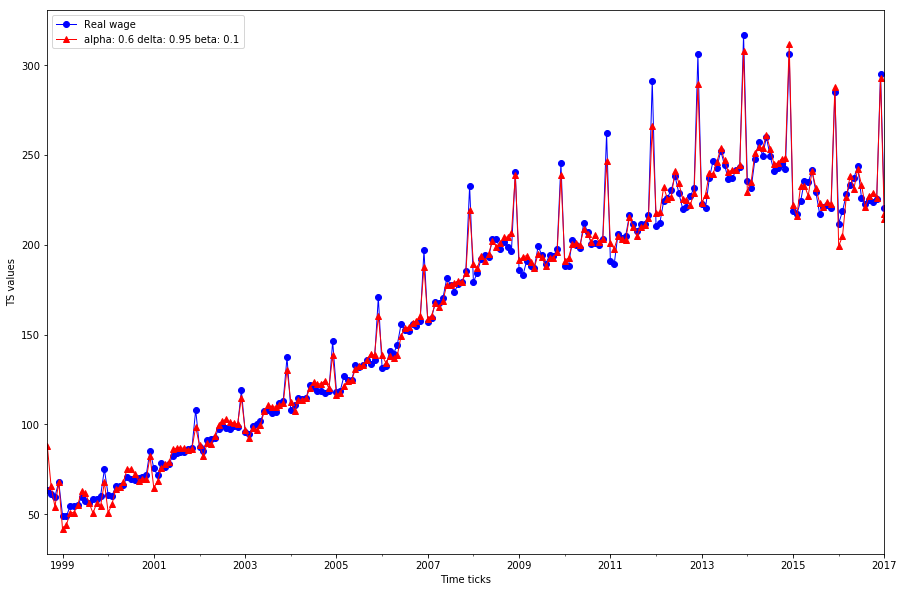

In [46]:
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params={'alpha': min_alpha, 'beta': min_beta, 'delta': min_delta, 'seasonality_period':12}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(min_alpha) + ' delta: '+ str(min_delta) + ' beta: '+ str(min_beta))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

### -4-

In [47]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

5.727242630717285


Loss of SES:           21.958

Loss of Winter's ES: 5.668

Loss of Theil Wage ES: 5.727

Comparing the Accuracy (the loss), Winters model is doing better than Theil Wage ES (but not much) and is doing much better than SES. SES is doing the worst.

### -5-

Theil-Wage model can be improved by considering multiplicative trend with additive seasonality, or multiplicative seasonality with additive trend. 

### -6- 
check for unstable 

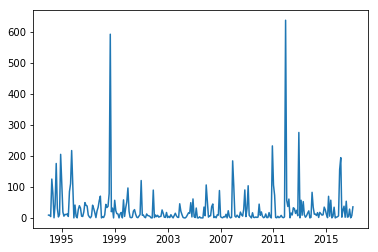

In [48]:
Params={'alpha':min_alpha, 'beta':min_beta, 'delta': min_delta, 'seasonality_period':12}
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    
_, loss_additive = qualityRMSE(ts, frc_ts)

plt.plot(loss_additive)

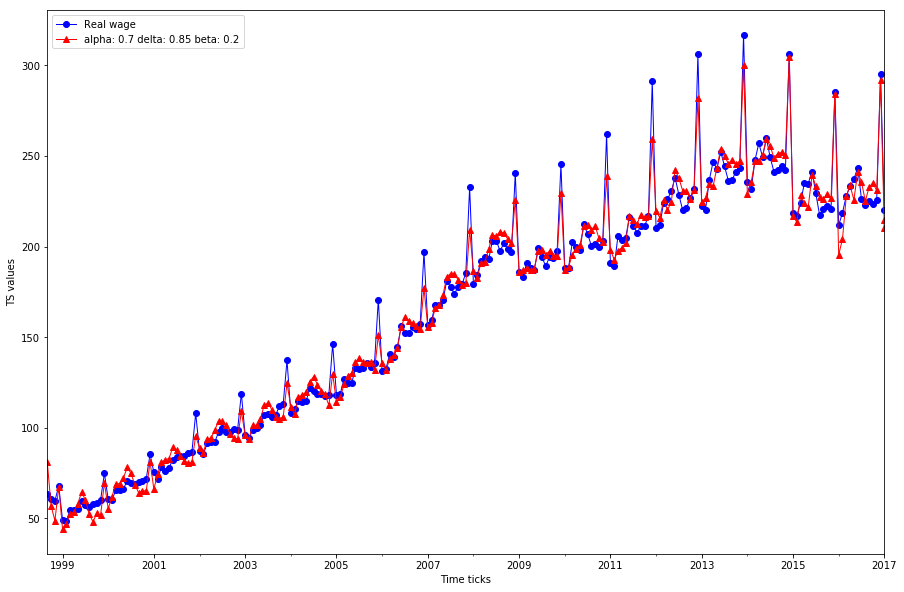

In [49]:
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_additive= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')
 
min_alpha_add = min_alpha
min_delta_add = min_delta
min_beta_add = min_beta

min_alpha_add_c = min_alpha+0.1
min_delta_add_c =  min_delta-0.1
min_beta_add_c = min_beta+0.1
# ES params
Params={'alpha': min_alpha_add_c, 'beta': min_beta_add_c, 'delta':min_delta_add_c, 'seasonality_period':12}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_additive[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts_additive[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(min_alpha_add_c) + ' delta: '+ str(min_delta_add_c) + ' beta: '+ str(min_beta_add_c))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

-----

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

### -1-

In [50]:
##ESM(M, A) Multplicative trend, with additive seasonality

# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delta <scalar in [0,1]> - seasonality smoothing parameter
#    beta <scalar in [0,1]> - trend smoothing parameter

def ESM(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    delta = Params['delta']
    
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    b= 0
    l= 0               # initialize ts level 
    s= [np.NaN]*(p)    # initalize seasonality values (it must be vector of lenth p)
    s[0] = x[0]
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]# initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr]-l# TODO: itinilize 
            
            if math.isnan(b):
                b= x[cntr]# initialize 
               
            l_saved = l
            s_saved = s[cntr % p]
            
            l = alpha * (x[cntr] - s[cntr % p]) + (1- alpha) * (l + b)            # recurrent smoothing of level 
            b = beta * (l /( l_saved* (l_saved!=0)+ 0.1*(l_saved == 0)))+(1 - beta)*b   #recurrent smoothing of trend
            s[cntr % p] = delta * (x[cntr] - l ) + (1 - delta) * s[cntr % p] # recurrent smoothing of seasonality
            
            
        FORECAST[cntr+h] = l * b * h + s[(cntr+h) % p]
    return FORECAST

### -2-

In [51]:
h = 1

start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
ts1 = ts.loc[:'2015-01']
frc_ts = pd.DataFrame(index = ts1.index.append(rng), columns = ts.columns)

ALPHA = np.arange(0.1, 1, 0.05)

min_loss= math.inf
min_beta = 0
min_alpha = 0
min_delta = 0

for alpha in ALPHA:
    for beta in ALPHA:
        for delta in ALPHA:
            Params={'alpha':alpha, 'beta':beta, 'delta': delta, 'seasonality_period':12}
            for cntr in ts1.columns:
                x = np.array(ts1[cntr])
                frc_ts[cntr] = ESM(x, h, Params)
            

            Quality, _ = qualityRMSE(ts1 , frc_ts)

            if(min_loss > Quality[0]):
                min_loss = Quality[0]
                min_beta = beta
                min_alpha = alpha
                min_delta = delta
            #print('alpha:', alpha,'beta:', beta, ' delta:', delta ,'loss:',  Quality[0])
        
print()
print('alpha:', min_alpha,'beta:', min_beta, 'delta:', delta, 'loss:',  min_loss)


alpha: 0.4 beta: 0.6 delta: 0.95 loss: 4.73989884388


Optimal value for:

alpha: 0.4

beta: 0.6
    
delta: 0.95
    
loss: 4.73989884388

### -3-

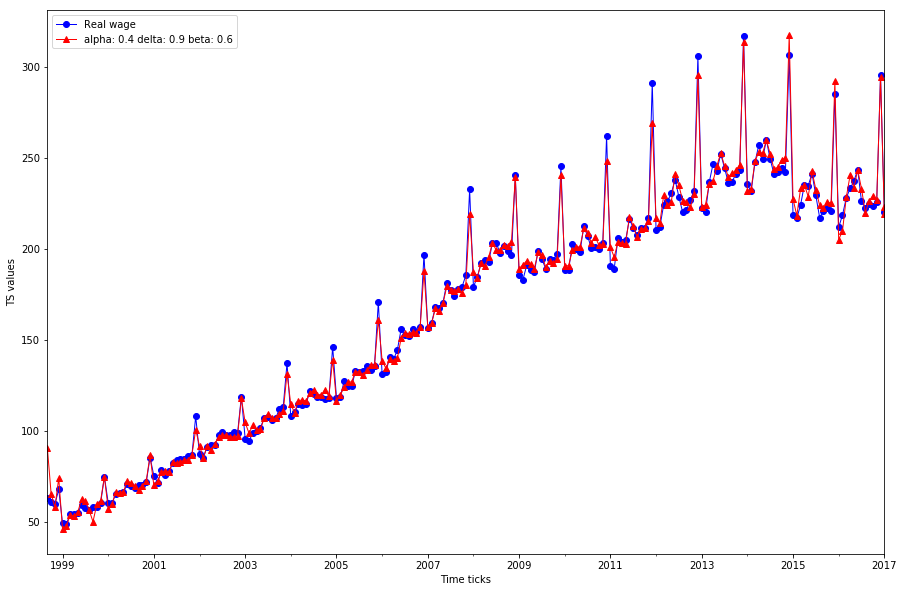

In [52]:
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
Params={'alpha':min_alpha, 'beta':min_beta, 'delta': min_delta, 'seasonality_period':12}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = ESM(x, h, Params)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts[frc_ts.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,10), linewidth=1.0, label='alpha: '+str(min_alpha)+' delta: '+ str(min_delta) + ' beta: '+ str(min_beta))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

### -4-

In [53]:
ts_2 = ts[ts.columns[ts_num]].loc['2016-02':'2017-01']
frc_ts_2=frc_ts[ frc_ts.columns[ts_num] ].loc['2016-02':'2017-01']

Quality, _ = qualityRMSE(ts_2, frc_ts_2)
print(Quality)

4.433622114445842


loss of SES:           21.958

loss of Winter's ES: 5.668

loss of Theil Wage ES: 5.727

loss of ESM(M,A): 4.433



Comparing the Accuracy (the loss), ESM(M, A) model is doing better than SES, Theil Wage ES and Winter's ES. Theil Wage ES is doing the worst. Winter's ES and Theil Wage ES are doing almost the same in terms of loss.

### -5-

In [54]:
min_alpha_mult = min_alpha
min_delta_mult = min_delta
min_beta_mult = min_beta

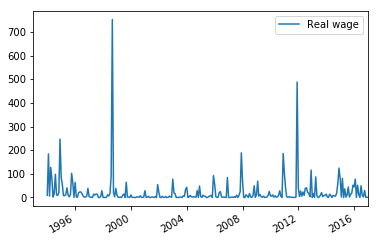

In [55]:
Params={'alpha':min_alpha, 'beta':min_beta, 'delta': min_delta, 'seasonality_period':12}
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = ESM(x, h, Params)
    
_, loss_mult = qualityRMSE(ts , frc_ts)

loss_mult.plot()

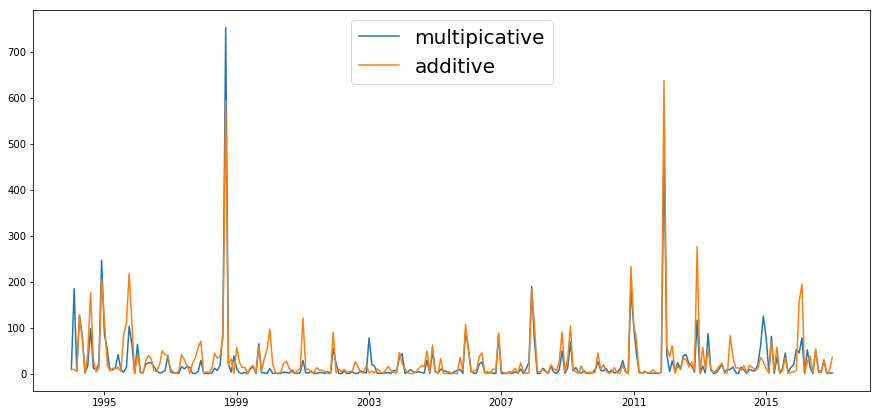

In [56]:
plt.figure(figsize =(15,7))

plt.plot(loss_mult, label = 'multipicative')
plt.plot(loss_additive,  label = 'additive')
plt.legend(fontsize = 20)

Let's make a small changes to our optimal values of alpha, beta and delta and see if the forecast will be unstable 

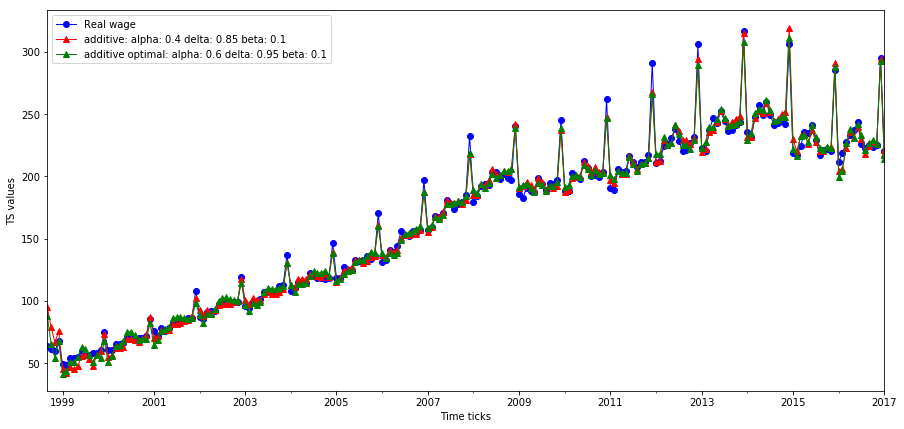

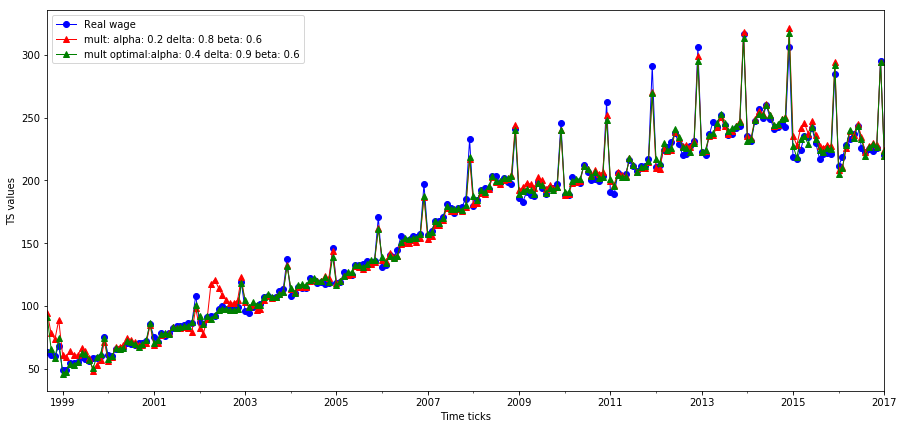

In [57]:
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_additive= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
frc_ts_additive_optimal= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

min_alpha_add_c = min_alpha_add - 0.2
min_beta_add_c = min_beta_add 
min_delta_add_c = min_delta_add -0.1

Params={'alpha': min_alpha_add_c, 'beta': min_beta_add_c, 'delta':min_delta_add_c, 'seasonality_period':12}
Params_optimal = {'alpha': min_alpha_add, 'beta': min_beta_add, 'delta':min_delta_add, 'seasonality_period':12}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_additive[cntr] = TheilWageExponentialSmoothing(x, h, Params)
    frc_ts_additive_optimal[cntr] = TheilWageExponentialSmoothing(x, h, Params_optimal)
    
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts_additive[frc_ts_additive.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,7), linewidth=1.0, label='additive: alpha: '+str(min_alpha_add_c) + ' delta: '+ str(min_delta_add_c) + ' beta: '+ str(min_beta_add_c))
    frc_ts_additive_optimal[frc_ts_additive.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='g-^', figsize=(15,7), linewidth=1.0, label='additive optimal: alpha: '+str(min_alpha_add) + ' delta: '+ str(min_delta_add) + ' beta: '+ str(min_beta_add))
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()
    
    
    
    
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_mult= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
frc_ts_mult_optimal= pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

ts.loc['1998-09':'2017-01'].plot(style='b', linewidth=1.0, marker='o')

# ES params
min_alpha_c = min_alpha_mult - 0.2
min_beta_c = min_beta_mult 
min_delta_c = min_delta_mult-0.1

Params={'alpha':min_alpha_c, 'beta':min_beta_c, 'delta': min_delta_c, 'seasonality_period':12}
Params_optimal={'alpha':min_alpha_mult, 'beta':min_beta_mult, 'delta': min_delta_mult, 'seasonality_period':12}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_mult[cntr] = ESM(x, h, Params)
    frc_ts_mult_optimal[cntr] = ESM(x, h, Params_optimal)
    # Example: draw of ts and it's forecast 
    ts_num=0
    frc_ts_mult[frc_ts_mult.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='r-^', figsize=(15,7), linewidth=1.0, label='mult: alpha: '+str(min_alpha_c)+' delta: '+ str(min_delta_c) + ' beta: '+ str(min_beta_c))
    frc_ts_mult_optimal[frc_ts_mult_optimal.columns[ts_num]].loc['1998-09':'2017-01'].plot(style='g-^', figsize=(15,7), linewidth=1.0, label='mult optimal:alpha: '+str(min_alpha)+' delta: '+ str(min_delta) + ' beta: '+ str(min_beta))

    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()

We can see from the graph that:

It is true that multiplicative model is more unstable than additive. As we can see from the multiplicative graph making small changes to the parameters is resulting in divergence in the forecast (the red line)

# THE END